# <font color = 'red'>1. *Introduction to Data in Digital Engineering (Handling Structured Data)*

Module Overview: A Practical Dive into Data Handling in Digital Engineering

In this module, we will embrace a hands-on approach to working with structured data in digital engineering. Our journey begins with ensuring you are comfortable with the foundational concepts and examples laid out in the Yellow Belt Data Module. Once equipped, we will use a specific manufacturing dataset to hone our practical skills in three key areas:

- **Data Loading and Exploration:** Efficiently importing and examining structured datasets to uncover patterns and initial insights.
- **Data Cleaning:** Addressing missing values, ensuring consistency, and preparing the dataset for robust analysis.
- **Outlier Detection and Handling:** Identifying anomalies and making data-driven decisions on their treatment.

## *1.1 Loading the Dataset*
We start by importing the necessary library, `pandas`, which is essential for data manipulation and analysis. 
Then, we load our dataset from a CSV file using `pandas.read_csv` function. 
This step involves specifying the path to the file within the current directory and the folder `Module 1 Content`. **For those keen to explore the accompanying code, it can be revealed by clicking the "read" symbol; clicking it again will hide the code. This functionality is available for each individual cell.**

After loading the dataset, it is helpful to preview the first few rows using the `df.head()` method. This provides a quick snapshot of the data, including the types of data columns and a glimpse of the values, enabling us to confirm that the data has loaded correctly and understand its structure.

<font color='#0024CC'>
    
### Data Description

1. **UDI**: Unique identifier for each record.
2. **Product ID**: Identifier for the product being manufactured.
3. **Type**: The type or category of the product.
4. **Air temperature [K]**: The air temperature in Kelvin during the manufacturing process.
5. **Process temperature [K]**: The process temperature in Kelvin during the manufacturing process.
6. **Rotational speed [rpm]**: The rotational speed of the machinery in revolutions per minute.
7. **Torque [Nm]**: The torque exerted by the machinery in Newton meters.
8. **Tool wear [min]**: The tool wear time in minutes.
9. **Target**: The target variable indicating the outcome or result of the manufacturing process.
10. **Failure Type**: The type of failure observed, if any.

</font>

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Module 1 Content/predictive_maintenance.csv')

# View Dataset
df.head(6)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,2,L47181,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,3,L47182,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,4,L47183,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,5,L47184,L,298.2,308.7,1408.0,40.0,NaN,0,No Failure
5,6,M14865,M,298.1,308.6,1425.0,41.9,11.0,0,No Failure


### *1.2 Inspecting Challenges in the Dataset*
Once the data is loaded, it's crucial to inspect it for any common issues that might affect the analysis. 
This includes checking for missing values, outliers, and incorrect data types. 
We use `df.info()` to get a concise summary of the dataframe, including the number of non-null entries and data type of each column.

In [4]:
# Inspect data for common issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      9481 non-null   float64
 4   Process temperature [K]  9685 non-null   float64
 5   Rotational speed [rpm]   9615 non-null   float64
 6   Torque [Nm]              9664 non-null   float64
 7   Tool wear [min]          9688 non-null   float64
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 781.4+ KB


The dataset inspection using `df.info()` reveals missing values in several operational parameters such as 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', and 'Tool wear [min]'. This is not uncommon in manufacturing datasets, where such issues can occur due to several factors:

- **Sensor Malfunctions:** Critical sensor failures or maintenance lapses can prevent accurate data logging.
- **Data Transmission Errors:** Issues in data transmission can lead to incomplete records, especially in environments with electronic interferences.
- **Operational Disruptions:** Adjustments in production processes or machine downtimes often result in data capture gaps.

Addressing these gaps is essential for reliable analysis, prompting the need for robust data collection and maintenance protocols in industrial settings.

In data engineering and analysis, handling missing data is a crucial aspect to ensure data integrity and reliability.
- **Methods to Handle Missing Data:**
  - **Imputation:** Replacing missing values with estimated ones based on other available data. Common methods include mean imputation, median imputation, and using machine learning models for prediction.
  - **Removal:** Excluding data entries with missing values if the missing proportion is relatively small and its impact is negligible.
  - **Flagging:** Marking or flagging missing values so they can be acknowledged during analysis without altering the dataset.

### *1.3 Generating Summary Statistics*

In data analysis, generating summary statistics is a key step to understanding the dataset's central tendency, dispersion, and overall distribution. Summary statistics offer a concise way to summarize the essential characteristics of numerical data, and they are foundational in exploratory data analysis (EDA).

- **Central Tendency**: This refers to the measures that represent the center or typical value of a dataset. The most common measures are:
  - **Mean**: The average value of the data, calculated as the sum of all data points divided by the number of data points.
  - **Median**: The middle value when the data is sorted in ascending or descending order. It is less sensitive to outliers than the mean.
  - **Mode**: The most frequently occurring value in the dataset.

- **Dispersion**: This refers to the spread or variability in the dataset. Common measures include:
  - **Standard Deviation**: This measures how much individual data points differ from the mean. A higher standard deviation indicates that the data is more spread out.
  - **Variance**: The square of the standard deviation, representing the average of the squared differences from the mean.
  - **Range**: The difference between the maximum and minimum values in the dataset.

- **Shape of Distribution**: This refers to how the data is distributed across values. Commonly assessed through:
  - **Skewness**: A measure of the asymmetry of the data distribution. Positive skew indicates that the data’s tail is skewed to the right, while negative skew indicates a left skew.
  - **Kurtosis**: A measure of the "tailedness" of the data distribution, showing how outliers or extreme values are distributed.

By calculating and interpreting these statistics, you can gain a deeper understanding of the data's structure, which helps to inform subsequent analysis or modeling steps.

To further understand the dataset, we generate summary statistics which provide insights into the central tendency,
dispersion, and shape of the dataset’s distribution. We use `df.describe()` which includes mean, standard deviation, minimum, and maximum values for numerical columns.



In [7]:
# Generate summary statistics
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,9481.000000,9685.000000,9615.000000,9664.000000,9688.000000,10000.000000
mean,5000.50000,300.005390,310.000299,1539.410088,39.981281,107.979356,0.033900
std,2886.89568,2.003227,1.485337,179.877975,9.972205,63.656004,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1504.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1613.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


The dataset's descriptive statistics reveal key insights into the manufacturing process:

- **Temperature Stability**: Both air and process temperatures show low variability, indicating a controlled environment essential for quality consistency.
- **Rotational Speed Variance**: There is a notable spread in rotational speeds (1168 to 2886 rpm), suggesting operational adjustments or different machine settings.
- **Torque Variability**: Torque shows significant fluctuations (from 3.8 to 76.6 Nm), likely reflecting varying operational demands.
- **Tool Wear Range**: Tool wear varies widely (0 to 253 minutes), pointing to differences in machine usage intensity or maintenance practices.

# <font color = 'red'>*2. Data Visualization*

### *2.1 Basic Data Visualization with Scatter Plot*
Visualizing data helps in identifying relationships between variables, patterns, and potential outliers. A scatter plot is particularly useful for examining the relationship between two numerical variables.

#### Importance of Data Visualization

From a theoretical perspective, data visualization plays a crucial role in data analysis for several reasons:

- **Identifying Relationships**: Scatter plots and other visualizations can help reveal relationships between variables, such as linear or non-linear correlations. For example, if two variables show a positive or negative trend when plotted, this can indicate a potential relationship.
  
- **Pattern Recognition**: Visualizations allow us to recognize patterns, clusters, or trends that might not be immediately apparent from raw data alone. For instance, scatter plots can highlight clusters of data points or identify outliers, which may indicate anomalies or errors.

- **Outlier Detection**: By plotting data points, outliers (values that fall outside the general distribution) become immediately visible. These outliers may indicate measurement errors, rare events, or special cases that need further investigation.

- **Communicating Insights**: Visualizations help communicate insights effectively to stakeholders, especially those without a deep statistical background. They provide an intuitive way to present complex information, making it easier for decision-makers to understand the data.

- **Exploratory Data Analysis (EDA)**: Visualizations are a crucial part of EDA, a method used to summarize the main characteristics of a dataset, often with visual methods. During EDA, a scatter plot can help assess the distribution of data and uncover any potential biases or data issues that need to be addressed before modeling.



Here, we'll plot `Air temperature [K]` against `Process temperature [K]` to see how these temperatures relate in the manufacturing process. This can be crucial for understanding temperature dynamics and their impact on product quality and machine performance.
We will use `matplotlib` for plotting, which provides a straightforward way to create scatter plots.

The plot show direct positive correlation between the Air and Process Temperatures.

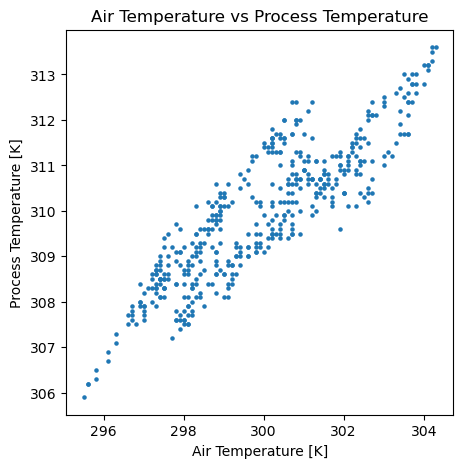

In [60]:
# Scatter plot
plt.figure(figsize = (5,5))
plt.scatter(df['Air temperature [K]'].iloc[::20], df['Process temperature [K]'].iloc[::20], s = 5)
plt.title('Air Temperature vs Process Temperature')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Process Temperature [K]')
plt.show()

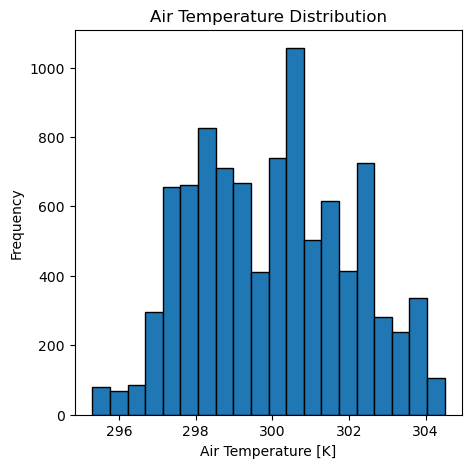

In [57]:
# Plotting histogram for Air Temperature [K]
plt.figure(figsize = (5,5))
plt.hist(df['Air temperature [K]'], bins=20, edgecolor='black')
plt.title('Air Temperature Distribution')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Frequency')
plt.show()

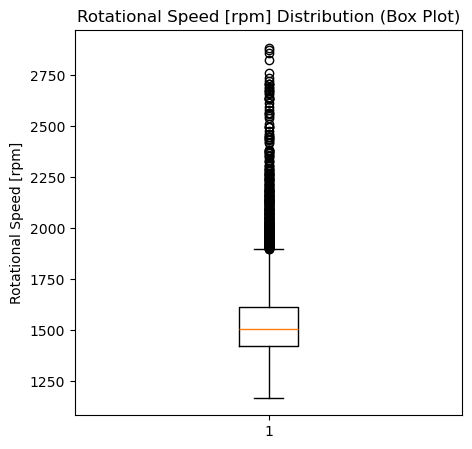

In [56]:
# Box plot for Air Temperature [K] to detect outliers
plt.figure(figsize = (5,5))
plt.boxplot(df['Rotational speed [rpm]'].dropna())
plt.title('Rotational Speed [rpm] Distribution (Box Plot)')  # Title
plt.ylabel('Rotational Speed [rpm]')  # Y-axis label
plt.show()

### *2.2 Visualizing Failure Types*

Understanding the distribution of failure types is crucial for identifying common issues and prioritizing maintenance efforts. A bar plot is an effective way to visualize the counts of different failure types in the dataset. This visualization helps in quickly identifying the most frequent types of failures and making informed decisions for improving the manufacturing process.

We will use `matplotlib` to create the bar plot, which provides a clear representation of the failure type counts.


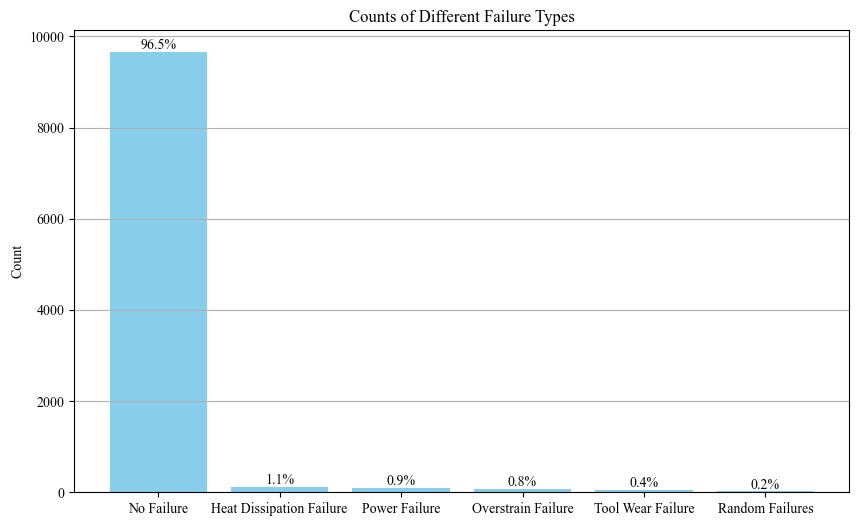

In [5]:
import matplotlib.pyplot as plt

# Set global font properties for all matplotlib plots
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10  # Set a default smaller font size


# Calculate the counts of each failure type
failure_counts = df['Failure Type'].value_counts()

# Calculate the percentage for each failure type
failure_percentages = (failure_counts / failure_counts.sum()) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(failure_counts.index, failure_counts, color='skyblue')

# Add percentage labels on top of the bars
for bar, percentage in zip(bars, failure_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Counts of Different Failure Types')
# plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# <font color = 'red'>*Data Preprocessing*

## *3.1 Handling Missing Data*

Handling missing data is crucial in ensuring the quality and reliability of analyses. We will explore two common methods:

1. **Dropping missing data**: This approach involves removing rows or columns that contain missing values, which is straightforward but may result in loss of valuable data if not used judiciously.
2. **Filling missing data**: This method involves replacing missing values with statistically relevant figures (mean, median, or mode) or using methods like forward/backward filling, which are particularly useful in time-series data.

Both techniques help in maintaining the integrity of the dataset for robust analysis.

In [6]:
# Option 1: Delete rows with missing data

# Drop rows with any missing values
cleaned_df = df.dropna()

# We inspect the data again
cleaned_df.info()
data = cleaned_df.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 8272 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      8272 non-null   int64  
 1   Product ID               8272 non-null   object 
 2   Type                     8272 non-null   object 
 3   Air temperature [K]      8272 non-null   float64
 4   Process temperature [K]  8272 non-null   float64
 5   Rotational speed [rpm]   8272 non-null   float64
 6   Torque [Nm]              8272 non-null   float64
 7   Tool wear [min]          8272 non-null   float64
 8   Target                   8272 non-null   int64  
 9   Failure Type             8272 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 710.9+ KB


1. **Fill Numerical Data with Mean**: Missing values in numerical columns are replaced with the average (mean) of the column. This ensures the numbers remain consistent and balanced.

2. **Fill Categorical Data with Mode**: Missing values in categorical columns are replaced with the most frequent value (mode). This keeps the categories representative of the data.

#### Steps:

- Separate the numerical and categorical columns.
- Fill numerical columns with their mean values.
- Fill categorical columns with their mode values.
- Combine the processed columns back into a single dataset.

This approach ensures the dataset is complete and ready for analysis while maintaining its structure.


In [7]:
import pandas as pd

# Fill numerical columns with mean
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_filled_numeric = df_numeric.fillna(df_numeric.mean())

# Fill categorical columns with mode
df_categorical = df.select_dtypes(include=['object'])
df_filled_categorical = df_categorical.apply(lambda x: x.fillna(x.mode()[0]))

# Combine the filled numerical and categorical DataFrames
df_filled = pd.concat([df_filled_numeric, df_filled_categorical], axis=1)

df_filled
data = df_filled.copy()

### *3.2 Encoding Techniques for Categorical Data*

Categorical data often needs to be converted into a numerical format for analysis and machine learning tasks. Many algorithms require numerical input, and raw categorical data may not provide sufficient insights or be suitable for mathematical operations. Below are several encoding techniques used to convert categorical data into numerical formats:

#### 1. One-Hot Encoding
One-hot encoding represents each category as a binary column. If a category is present in a record, the corresponding column is marked as `1`, otherwise `0`. This method is useful for categorical variables with no ordinal relationship.

**Example**:


| Failure Type            | None | Heat Dissipation Failure | Power Failure |
|-------------------------|------|--------------------------|---------------|
| None                   | 1    | 0                        | 0             |
| Heat Dissipation Failure | 0    | 1                        | 0             |
| Power Failure           | 0    | 0                        | 1             |


#### 2. Label Encoding
Label encoding assigns a unique numerical value to each category. While simple and efficient for ordinal data, it may introduce unintended ordinal relationships in nominal data.

**Example**:


| Failure Type            | Encoded Value |
|-------------------------|---------------|
| None                   | 0             |
| Heat Dissipation Failure | 1             |
| Power Failure           | 2             |


#### 3. Binary Encoding
Binary encoding converts categories into binary numbers, which are then split into separate columns. This method is more memory-efficient for categorical variables with many unique values.

**Example**:


| Failure Type            | Binary Encoding |
|-------------------------|-----------------|
| None                   | 00              |
| Heat Dissipation Failure | 01              |
| Power Failure           | 10              |


#### 4. Frequency Encoding
Frequency encoding replaces categories with their frequency of occurrence in the dataset. This method is useful when the frequency of categories carries important information.

**Example**:


| Failure Type            | Frequency Encoding |
|-------------------------|--------------------|
| None                   | 0.5                |
| Heat Dissipation Failure | 0.3                |
| Power Failure           | 0.2                |


### Choosing the Right Technique
Each encoding technique has its own advantages and is suitable for different scenarios. It is important to select the appropriate method based on:
- The nature of the categorical data (nominal or ordinal).
- The requirements of the analysis or machine learning model.

By effectively converting categorical data into numerical formats, you can perform more meaningful analyses and enhance the performance of your models.

<font color='#0024CC'>
    
 **Back to Example**, we applied encoding to the categorical data in the `Failure Type` and `Type` columns:

1. **Failure Type**: We used **Label Encoding** to convert the categorical values into numerical format. Specifically, the new column `No Failure Encoded` assigns:
   - `1` when there is "No Failure."
   - `0` for any type of failure.

2. **Type**: We used **One-Hot Encoding** to create binary columns for each category in the `Type` column, representing the presence (`1`) or absence (`0`) of each type.

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for Failure Type
label_encoder = LabelEncoder()
data['No Failure Encoded'] = label_encoder.fit_transform(data['Failure Type'])

# One-Hot Encoding for Type
data_encoded = pd.get_dummies(data, columns=['Type'], prefix='Type')

# Display the updated DataFrame
data_encoded

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Product ID,Failure Type,No Failure Encoded,Type_H,Type_L,Type_M
0,1,298.10000,308.6,1551.000000,42.800000,0.000000,0,M14860,No Failure,1,False,False,True
1,2,298.20000,308.7,1408.000000,46.300000,3.000000,0,L47181,No Failure,1,False,True,False
2,3,298.10000,308.5,1498.000000,49.400000,5.000000,0,L47182,No Failure,1,False,True,False
3,4,298.20000,308.6,1433.000000,39.500000,7.000000,0,L47183,No Failure,1,False,True,False
4,5,298.20000,308.7,1408.000000,40.000000,107.979356,0,L47184,No Failure,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,298.80000,308.4,1604.000000,29.500000,14.000000,0,M24855,No Failure,1,False,False,True
9996,9997,298.90000,308.4,1632.000000,31.800000,17.000000,0,H39410,No Failure,1,True,False,False
9997,9998,300.00539,308.6,1645.000000,39.981281,22.000000,0,M24857,No Failure,1,False,False,True
9998,9999,299.00000,308.7,1539.410088,48.500000,25.000000,0,H39412,No Failure,1,True,False,False


<font color='#0024CC'>
To remove unnecessary columns such as `UDI` (a unique identifier) and `Failure Type` (already encoded as `No Failure Encoded`), we can use the `drop` function from pandas. Here's the code:

In [9]:
# Dropping unnecessary columns
columns_to_drop = ['UDI', 'Failure Type']
data_encoded_cleaned = data_encoded.drop(columns=columns_to_drop)

# Display the updated DataFrame
data_encoded_cleaned

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Product ID,No Failure Encoded,Type_H,Type_L,Type_M
0,298.10000,308.6,1551.000000,42.800000,0.000000,0,M14860,1,False,False,True
1,298.20000,308.7,1408.000000,46.300000,3.000000,0,L47181,1,False,True,False
2,298.10000,308.5,1498.000000,49.400000,5.000000,0,L47182,1,False,True,False
3,298.20000,308.6,1433.000000,39.500000,7.000000,0,L47183,1,False,True,False
4,298.20000,308.7,1408.000000,40.000000,107.979356,0,L47184,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.80000,308.4,1604.000000,29.500000,14.000000,0,M24855,1,False,False,True
9996,298.90000,308.4,1632.000000,31.800000,17.000000,0,H39410,1,True,False,False
9997,300.00539,308.6,1645.000000,39.981281,22.000000,0,M24857,1,False,False,True
9998,299.00000,308.7,1539.410088,48.500000,25.000000,0,H39412,1,True,False,False
